# Bay Wheels - An Alternative for Public Transportation
## by Carlos Carcamo

## Investigation Overview

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California. Is Bay Wheels a real solution? Are people using it for get to work or leisure purposes? Let's see some data that will give a good point to Bay Wheels. In this presentation we will see the realition beetween Trips, Trips Duration, Hours and Day of Week where the Bay Wheels service is used to get people from their homes to their office

## Dataset Overview

The dataset used for this Investigation consists of data from January 2019 to December 2019. More than 2 Million of trips were gathered to get this insights. The file contains data about Trip Duration, Start and End datetime for each each trip and the Station involve in the trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2019-baywheels-tripdata-wrangled.csv')

#Filter trips with duration less or equal to 45 minutes
df_45m = df.query('duration_sec<=2700')
df = df_45m

#Transform Days of Week into a Category
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' , 'Saturday', 'Sunday']
cat_dtype = pd.api.types.CategoricalDtype(categories=days_order, ordered=True)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(cat_dtype)

#Transfom Months into a Category
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
cat_dtype = pd.api.types.CategoricalDtype(categories=months, ordered=True)
df['start_time_month_name'] = df['start_time_month_name'].astype(cat_dtype)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,start_time_dayofweek,start_time_month_name,start_time_hour,trips
6,1188,2019-01-31 23:54:38.901,2019-02-01 00:14:27.900,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423181,Subscriber,Thursday,January,23,1
7,1254,2019-01-31 23:48:50.092,2019-02-01 00:09:44.497,318.0,San Carlos St at Market St,37.330698,-121.888979,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,Subscriber,Thursday,January,23,1
9,323,2019-01-31 23:59:47.568,2019-02-01 00:05:11.177,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,Subscriber,Thursday,January,23,1
10,2316,2019-01-31 23:25:59.866,2019-02-01 00:04:36.064,378.0,Empire St at 7th St,37.347745,-121.890800,292.0,Empire St at 1st St,37.344882,-121.896965,Subscriber,Thursday,January,23,1
11,433,2019-01-31 23:57:04.381,2019-02-01 00:04:17.489,266.0,Parker St at Fulton St,37.862464,-122.264791,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,Subscriber,Thursday,January,23,1


In [13]:
df.shape

(2361298, 16)

## Long or Short bike trips?

Let's start digging into the data. And try to discover how the trip durations are distributed. The trip duration seems to be distributed between 100 and 3000 seconds, having the strongest distribution between 300 and 1000 seconds (around 5 and 17 minutes). The mean time duration is 667 seconds (11.11 minutes). So this is leading us to the idea that peope preferd short trips. So, are people using it for get to work or leisure purposes? 

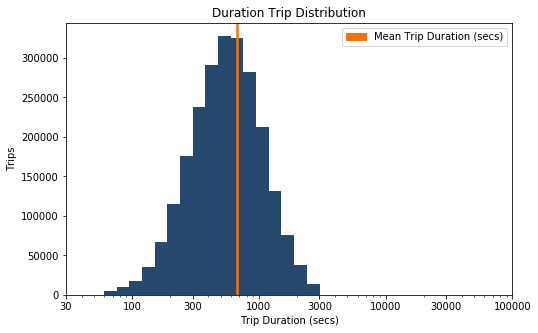

In [31]:
#Import lib to customize legend
import matplotlib.patches as mpatches

#Get mean duration again
mean_duration = df.duration_sec.mean()

#Define bins for log scale
bin_edges = 10 ** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max()) + 0.1, 0.1)

#Define ticks to show on chart
ticks = [30,100,300,1000,3000,10000,30000,100000]

#Plot the chart
plt.figure(figsize=[8, 5]);
plt.hist(data = df, x ='duration_sec', bins = bin_edges, color='#27496d');
plt.xscale("log");
plt.xticks(ticks,ticks);
plt.axvline(mean_duration, color = '#f97306', lw=2.5);
plt.title('Duration Trip Distribution')
plt.xlabel('Trip Duration (secs)');
plt.ylabel('Trips');
legend = mpatches.Patch(color='#f97306', label='Mean Trip Duration (secs)')
plt.legend(handles=[legend]);

## When is the best time to ride a bike?

Now, let's see in which days Bay Wheels have the highest demand of service. The following heat map shows us that weekdays have more activity than weekends. We can see 2 rush hours for the service in the weekdays, the fisrt one between 7 and 9 am. and the second one between 4 and 6 pm. This can be interpretated as people use the service to move from their homes to office in the morning (between 7 and 9 am) and from their offices to ther homes in the afternoom (between 4 and 6 pm), as the highest demand for the service occurs at the begining and at the end of the work journal.

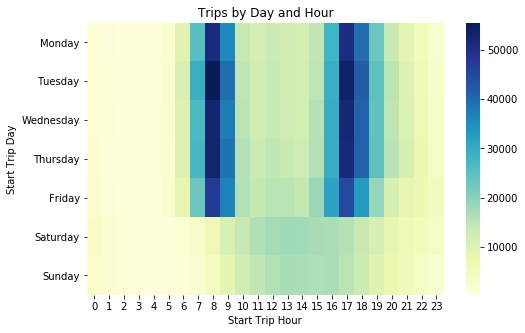

In [40]:
#Get trip by Day and Hour
ct_counts = df.groupby(['start_time_dayofweek', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hour', values = 'count')

#Plot the chart
plt.figure(figsize=[8, 5]);

sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Trips by Day and Hour')
plt.xlabel('Start Trip Hour');
plt.ylabel('Start Trip Day');

## How long is a trip by day and hour?

Let's to reinforce the idea of San Franciscans use Bay Wheels as a transportation for their works. This chart shows mean duration os trips per day per hour. The longer trips are rode on weekends, when people don't have a deadline hour to be present at the office. Also, something really intersting appeared at 8am for weekdays, the mean duration seems to be the same as the mean duration for the entire dataset, around 670secs. This can lead to say than people tend to go to work between 8 and 9 am.


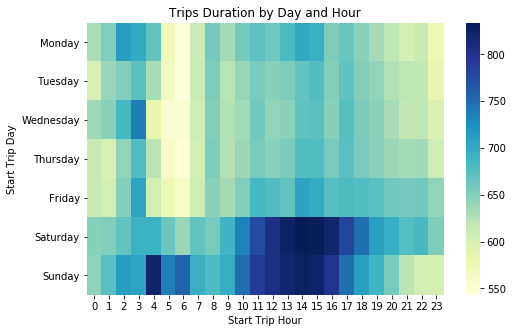

In [43]:
#Get trip duration mean by day and hour
ct_counts = df.groupby(['start_time_dayofweek', 'start_time_hour'])['duration_sec'].mean()
ct_counts = ct_counts.reset_index(name='mean')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hour', values = 'mean')

#Plot the chart
plt.figure(figsize=[8, 5]);
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Trips Duration by Day and Hour')
plt.xlabel('Start Trip Hour');
plt.ylabel('Start Trip Day');

## Trips by time for 2019

To conclude the analysis, let's see distribution of trips per month for 2019. This chart finishes answer the question *Are people using Bay Wheels for get to work or leisure purposes?*. People used to rest for spring and summer. In these seasons, a lot of people use to travel, leaving the city (even the country) and obviously stop working for a couple of days. The same thing happens for November and December, to Thanksgiving and Christmas.

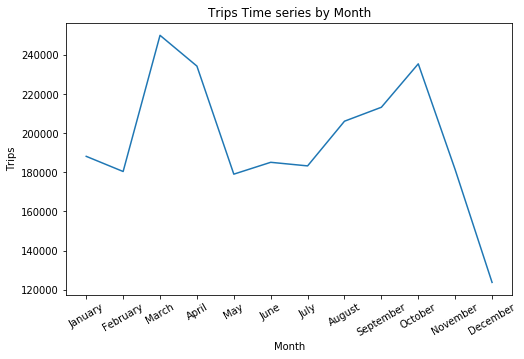

In [45]:
#Get total trips per month
df_months = df.groupby('start_time_month_name')['trips'].sum()
#Plot the chart
plt.figure(figsize=[8, 5]);
plt.plot(df_months.index, df_months);
plt.xticks(rotation=30);
plt.title('Trips Time series by Month')
plt.xlabel('Month');
plt.ylabel('Trips');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!